# Day 1:
- Understanding Different Layers (Convolution Operation, Activation Functions, Pooling Layers)
- Applying Full Convolutional layer to a real image of cat
- Explore ResNet Architecture (+ a little bit about Transfer Learning)

# Some Basics of CNNs (filters, pooling) and more

In [ ]:
import warnings
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

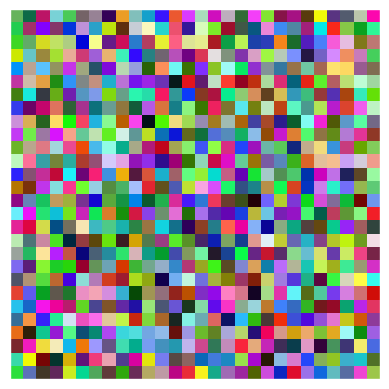

In [ ]:
# Let's implement from scratch Convolution and Pooling layers on a matrix (which represents a random image) (using ReLU activation)

np.random.seed(42)

random_matrix = np.random.randint(0, 255, (28, 28, 3))

plt.imshow(random_matrix)
plt.xticks([])
plt.yticks([])
plt.show()

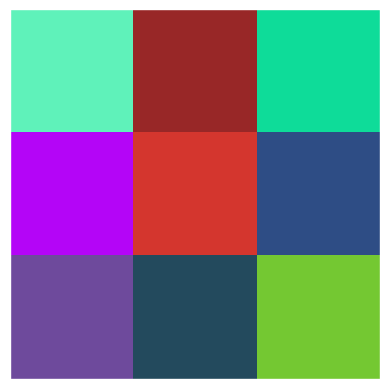

In [ ]:
np.random.seed(42)
filter_matrix = np.random.uniform(0, 1, (3, 3, 3))

plt.imshow(filter_matrix)
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
filter_size = 3
stride = 1
bias = -1352

# Calculate output dimensions by formula
output_height = (random_matrix.shape[0] - filter_size) // stride + 1
output_width = (random_matrix.shape[1] - filter_size) // stride + 1

output = np.zeros((output_height, output_width))

for i in range(0, output_height):
    for j in range(0, output_width):
        # Extract the region of interest
        region = random_matrix[i:i + filter_size, j:j + filter_size, :]

        # Perform element-wise multiplication and sum
        output[i, j] = np.sum(region * filter_matrix)

        # Add bias
        output[i, j] += bias

print(output.shape)

(26, 26)


In [ ]:
# Apply the ReLU activation function to the feature map

def relu(x):
  return np.maximum(0, x)

for i in range(0, output_height):
  for j in range(0, output_width):
    output[i, j] = relu(output[i, j])

print(output.shape)

(26, 26)


In [ ]:
# Let's implement max pooling

pool_size = 2
stride = 2

output_height = (output.shape[0] - pool_size) // stride + 1
output_width = (output.shape[1] - pool_size) // stride + 1

pool_output = np.zeros((output_height, output_width))

for i in range(0, output_height):
  for j in range(0, output_width):
    region = output[i * stride:i * stride + pool_size, j * stride:j * stride + pool_size]

    pool_output[i, j] = np.max(region)

print(pool_output.shape)

(13, 13)


In [ ]:
pool_size = 2
stride = 2

output_height = (output.shape[0] - pool_size) // stride + 1
output_width = (output.shape[1] - pool_size) // stride + 1

avg_pool_output = np.zeros((output_height, output_width))

for i in range(0, output_height):
  for j in range(0, output_width):
    region = output[i * stride:i * stride + pool_size, j * stride:j * stride + pool_size]

    avg_pool_output[i, j] = np.average(region)

print(avg_pool_output.shape)

(13, 13)


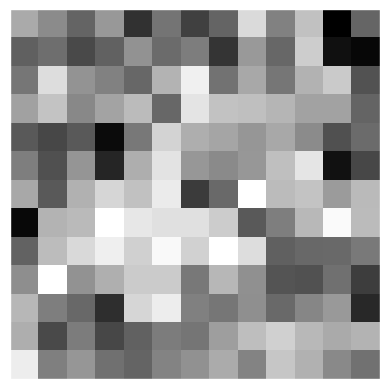

In [ ]:
plt.imshow(pool_output, cmap='binary')
plt.xticks([])
plt.yticks([])
plt.show()

**Just want to check how `tf.image.resize()` works!**

*It turned out that it works exactly like average pooling.*

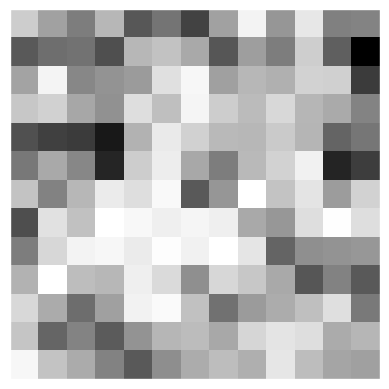

In [ ]:
mat_3d = np.zeros((26, 26, 3))
mat_3d[:, :, 0] = output
mat = tf.image.resize(mat_3d, size=[13, 13])

plt.imshow(mat[:,:,0], cmap='binary')
plt.grid(False)
plt.xticks([])
plt.yticks([])

plt.show()

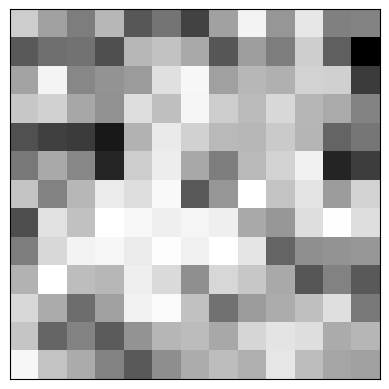

In [ ]:
plt.imshow(avg_pool_output, cmap='binary')
plt.xticks([])
plt.yticks([])
plt.show()

# Trying Filter on a Real Image

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure(figsize=(10,8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

In [ ]:
kernel = tf.constant([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1],
])

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

# os.listdir('/content/drive/MyDrive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
images_dir = os.path.join('/content/drive/MyDrive/Colab Notebooks/cv-learning-1-month', 'images')
images_dir

'/content/drive/MyDrive/Colab Notebooks/cv-learning-1-month/images'

In [ ]:
# Load the image
image_file_name = "maine-coon-img.jpg"

image = tf.io.read_file(os.path.join(images_dir, image_file_name))
image = tf.io.decode_image(image, channels=3)
image = tf.image.resize(image, size=(224, 224))
image = image / 255.0

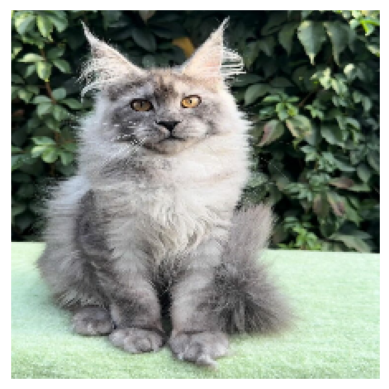

In [ ]:
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)

kernel = tf.expand_dims(kernel, axis=-1)  # Shape becomes (3, 3, 1)
kernel = tf.repeat(kernel, repeats=3, axis=-1)  # Shape becomes (3, 3, 3)
kernel = tf.expand_dims(kernel, axis=-1)
kernel = tf.cast(kernel, dtype=tf.float32)

In [ ]:
# Applying convolutional layer
filtered_image = tf.nn.conv2d(image, kernel, strides=1, padding='SAME')

# Remove the batch dimension
filtered_image = tf.squeeze(filtered_image)

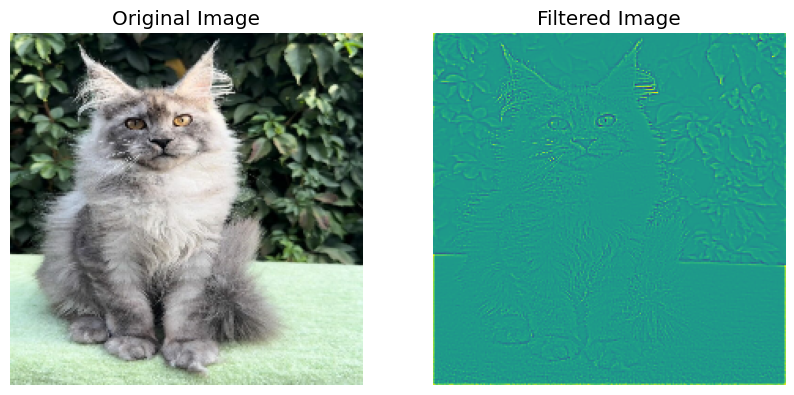

In [ ]:
plt.figure(figsize=(10,5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image[0])  # Display the image without batch dimension
plt.title("Original Image")
plt.axis('off')

# Filtered image
plt.subplot(1, 2, 2)
plt.imshow(filtered_image)
plt.title("Filtered Image")
plt.axis('off')

plt.show()

In [ ]:
# Activation layer
relu_fn = tf.nn.relu

# Image detection
image_detect = relu_fn(filtered_image)

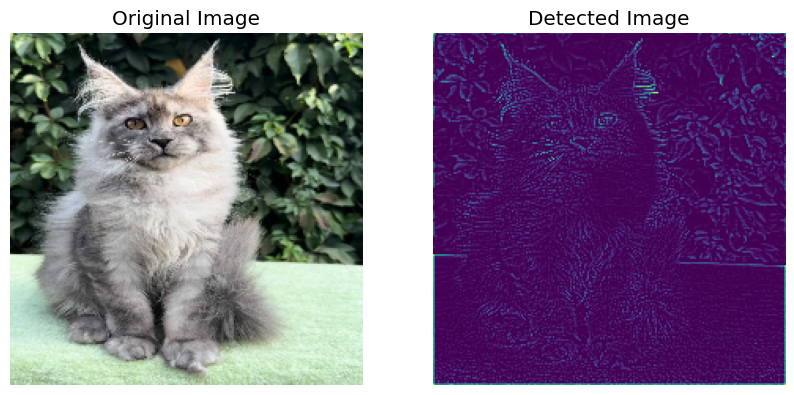

In [ ]:
plt.figure(figsize=(10,5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image[0])  # Display the image without batch dimension
plt.title("Original Image")
plt.axis('off')

# Detected image
plt.subplot(1, 2, 2)
plt.imshow(image_detect)
plt.title("Detected Image")
plt.axis('off')

plt.show()

In [ ]:
image_detect = np.expand_dims(image_detect, axis=-1)
image_detect = np.expand_dims(image_detect, axis=0)

In [ ]:
# Pooling layer
pool = tf.nn.pool

image_condense = pool(input=image_detect, window_shape=(2, 2), pooling_type='MAX',
                      strides=(2, 2),
                      padding='SAME')

image_condense = tf.squeeze(image_condense)

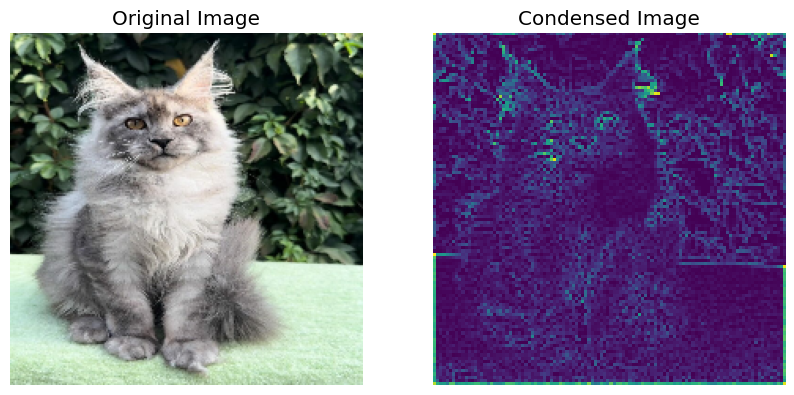

In [ ]:
plt.figure(figsize=(10,5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image[0])  # Display the image without batch dimension
plt.title("Original Image")
plt.axis('off')

# Condensed image
plt.subplot(1, 2, 2)
plt.imshow(image_condense)
plt.title("Condensed Image")
plt.axis('off')

plt.show()

# Transfer Learning with ResNet (Exploration)
**Good explanation of how ResNet works:** [Youtube Video](https://www.youtube.com/watch?v=Q1JCrG1bJ-A&ab_channel=ProfessorBryce)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(weights='imagenet', input_shape=(224, 224, 3), include_top=False)

In [ ]:
# Add custom classification layers on top
num_classes = 4  # just some random number

x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
predictions = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
# Freeze the pre-trained layers (Optional)
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Compile the model

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Here you would probably load your training and test datasets and then train
# this ResNet model on that dataset, but I'll not cover it here... (more in Transfer Learning chapter soon)

# ResNet pre-trained model loading and using it for prediction

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np

model = ResNet50(weights='imagenet')

def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))

    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    return img_array

def predict_image(img_path):
    img_array = load_and_preprocess_image(img_path)

    predictions = model.predict(img_array)

    # Top 3 predictions
    decoded_predictions = decode_predictions(predictions, top=3)

    return decoded_predictions

images_dir = os.path.join('/content/drive/MyDrive/Colab Notebooks/cv-learning-1-month', 'images')
image_file_name = "maine-coon-img.jpg"

predictions = predict_image(os.path.join(images_dir, image_file_name))

for i, (imagenet_id, label, score) in enumerate(predictions[0]):
    print(f"{i + 1}: {label} ({score:.4f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1: Persian_cat (0.6320)
2: keeshond (0.1095)
3: lynx (0.1078)


**So, the prediction is not precise, but, I mean, at least it's a cat, lol.😁**